#  Linear regression

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [34]:
with open(r'ex1data2.txt', 'r') as file:
    data = file.readlines()

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])

# Load the data and create numpy arrays X and y
X = data[:, 0:2]  # Features (first two columns)
y = data[:, 2:]   # Target variable (last column)

print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i, 0].item():.0f}')


[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


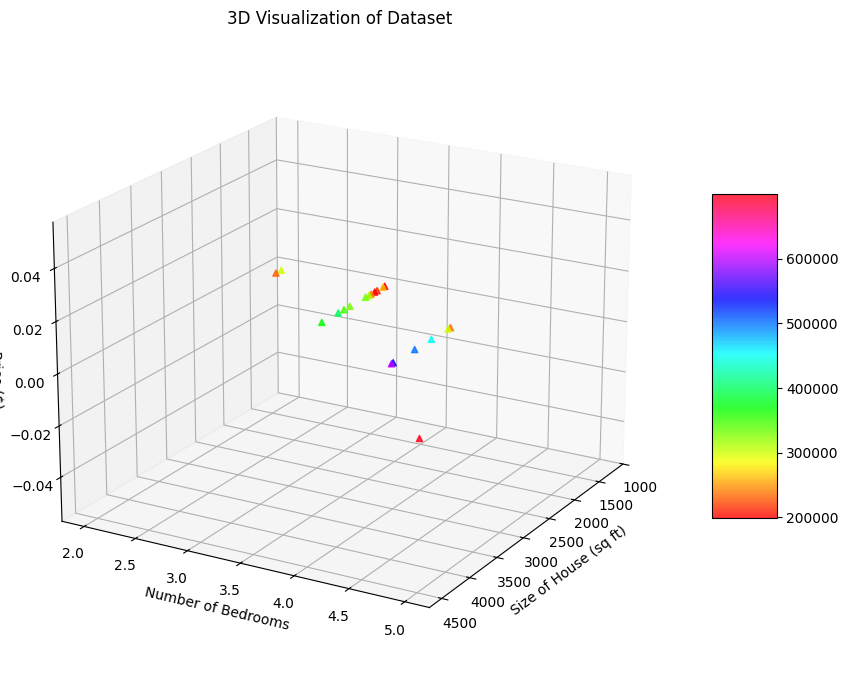

In [36]:
# ==================== Part 1: Plotting ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with red x markers
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')
# Label axes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Set grid and view angle similar to MATLAB
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# Feature normalization

Your task here is to complete the code in featureNormalize.m to

*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations

The mean and std should be:

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [37]:
X = data[:, 0:2]
def featureNormalize(X):
     # Calculate the mean and standard deviation of each feature
     mu = np.mean(X, axis=0)
     sigma = np.std(X, axis=0, ddof=1)
     
     # Normalize the features
     X_norm = (X - mu) / sigma
     
     return X_norm, mu, sigma


[X,mu, sigma] = featureNormalize(X)
print(f'mu= {mu}, std = {sigma}')
print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')
print(X.shape)

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]
First 10 examples from the dataset:
x = [0.1300 -0.2237]
x = [-0.5042 -0.2237]
x = [0.5025 -0.2237]
x = [-0.7357 -1.5378]
x = [1.2575 1.0904]
x = [-0.0197 1.0904]
x = [-0.5872 -0.2237]
x = [-0.7219 -0.2237]
x = [-0.7810 -0.2237]
x = [-0.6376 -0.2237]
(47, 2)


# Cost Function

The objective of linear regression is to minimize the cost function:
$ J \left( \theta \right) = \frac{1}{2m} \sum_{i=1}^{m}\left( h_{\theta} \left( x^{\left( i \right)} \right) - y^{\left( i \right)} \right)^{2} $

where the hypothesis h is given by
$ h_{\theta} \left( x \right) = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} $

In [38]:
# using numpy and scipy
# Sigmoid function
from scipy.optimize import minimize

#Implement cost function
def cost_function(theta, X, y):
    m = y.size  # number of training examples
    h = X @ theta  # hypothesis function
    J = (1 / (2 * m)) * np.sum(np.square(h - y))  # cost function
    return J

m = data.shape[0]
X = data[:, 0:2]
[X,mu, sigma] = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])
print(X[0:5,:])
theta = np.zeros((3, 1))
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")


[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]
Model parameters: [[0.]
 [0.]
 [0.]]
Cost function: 65591548106.45744


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

$$
J(\theta) = \frac{1}{2m} (X \theta - \vec{y})^{T} (X \theta - \vec{y})
$$

$$
X = \begin{bmatrix}
--- (x^{(1)})^{T} --- \\
--- (x^{(2)})^{T} --- \\
\vdots \\
--- (x^{(m)})^{T} ---
\end{bmatrix}
\quad
\vec{y} = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix}.
$$

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

Iteration $1$ Cost: $64300749594.565971$ Gradient: $-340412.660$ $-104632.934$ $-54123.684$

Iteration $2$ Cost: $63036794964.819702$ Gradient: $-337008.533$ $-103312.240$ $-53020.519$

Iteration $3$ Cost: $61799111840.657433$ Gradient: $-333638.448$ $-102010.519$ $-51935.389$

Iteration $4$ Cost: $60587140419.705620$ Gradient: $-330302.063$ $-100727.484$ $-50868.013$

Iteration $5$ Cost: $59400333187.446396$ Gradient: $-326999.043$ $-99462.857$ $-49818.116$


In [39]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 300
theta = np.zeros((3, 1))
alpha = 0.01
def gradientDescent(X, y, theta, alpha, iterations):
  m = len(y)  # number of training examples
  J_history = np.zeros(iterations)

  for iter in range(iterations):
    # Compute the hypothesis
    h = X @ theta # h is the predicted value
    
    # Compute the error
    error = h - y # error is the difference between predicted and actual values
    
    # Compute the gradient
    grad_J = (1 / m) * (X.T @ error) # gradient of the cost function
    
    # Update theta
    theta = theta - alpha * grad_J # gradient descent update rule
    
    # Save the cost J in every iteration
    # Compute the cost function
    J_history[iter] = cost_function(theta,X, y) # cost function value
    print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}\tGradient: {grad_J[0, 0]:.3f} {grad_J[1, 0]:.3f} {grad_J[2, 0]:.3f}")
  return theta

theta = gradientDescent(X, y, theta, alpha, iterations);
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
input_features = np.array([2000, 3])
normalized_features = (input_features - mu) / sigma
print(normalized_features)
# Add the bias term (1) as the first element
predict1 = np.hstack([1, normalized_features]) @ theta
print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a profit of ${(predict1 * 10000).item():.2f}')




Iteration 1	Cost: 64300749594.565971	Gradient: -340412.660 -104632.934 -54123.684
Iteration 2	Cost: 63036794964.819695	Gradient: -337008.533 -103312.240 -53020.519
Iteration 3	Cost: 61799111840.657433	Gradient: -333638.448 -102010.519 -51935.389
Iteration 4	Cost: 60587140419.705620	Gradient: -330302.063 -100727.484 -50868.013
Iteration 5	Cost: 59400333187.446388	Gradient: -326999.043 -99462.857 -49818.116
Iteration 6	Cost: 58238154637.679718	Gradient: -323729.052 -98216.361 -48785.425
Iteration 7	Cost: 57100080999.611237	Gradient: -320491.762 -96987.725 -47769.673
Iteration 8	Cost: 55985599971.401466	Gradient: -317286.844 -95776.680 -46770.596
Iteration 9	Cost: 54894210460.017029	Gradient: -314113.976 -94582.964 -45787.934
Iteration 10	Cost: 53825422327.227722	Gradient: -310972.836 -93406.316 -44821.432
Iteration 11	Cost: 52778756141.597954	Gradient: -307863.107 -92246.481 -43870.838
Iteration 12	Cost: 51753742936.324768	Gradient: -304784.476 -91103.208 -42935.905
Iteration 13	Cost: 50

# Visualization

# Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against
the number of the iterations.

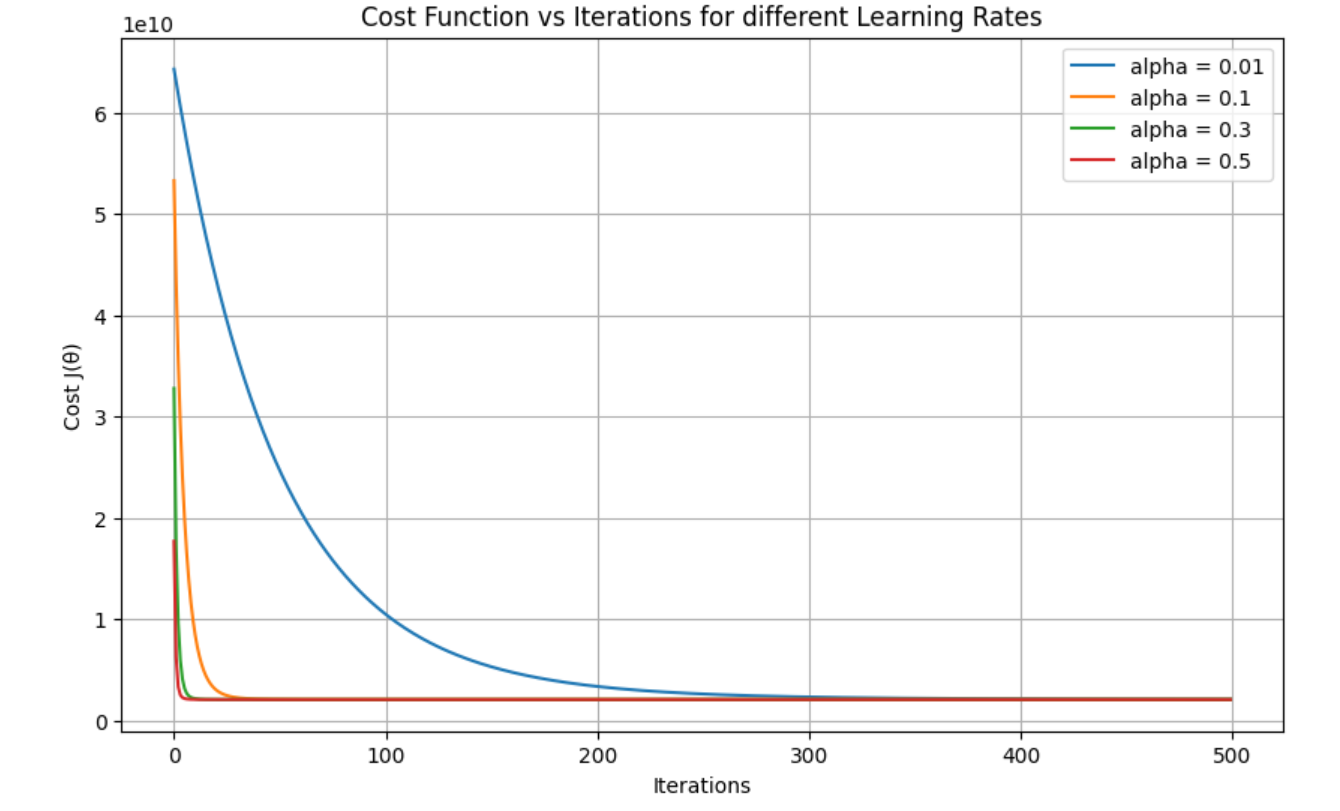

Alpha: 0.01, Iteration 1	Cost: 64300749594.565971	Gradient: -340412.660 -104632.934 -54123.684
Alpha: 0.01, Iteration 2	Cost: 63036794964.819695	Gradient: -337008.533 -103312.240 -53020.519
Alpha: 0.01, Iteration 3	Cost: 61799111840.657433	Gradient: -333638.448 -102010.519 -51935.389
Alpha: 0.01, Iteration 4	Cost: 60587140419.705620	Gradient: -330302.063 -100727.484 -50868.013
Alpha: 0.01, Iteration 5	Cost: 59400333187.446388	Gradient: -326999.043 -99462.857 -49818.116
Alpha: 0.01, Iteration 6	Cost: 58238154637.679718	Gradient: -323729.052 -98216.361 -48785.425
Alpha: 0.01, Iteration 7	Cost: 57100080999.611237	Gradient: -320491.762 -96987.725 -47769.673
Alpha: 0.01, Iteration 8	Cost: 55985599971.401466	Gradient: -317286.844 -95776.680 -46770.596
Alpha: 0.01, Iteration 9	Cost: 54894210460.017029	Gradient: -314113.976 -94582.964 -45787.934
Alpha: 0.01, Iteration 10	Cost: 53825422327.227722	Gradient: -310972.836 -93406.316 -44821.432
Alpha: 0.01, Iteration 11	Cost: 52778756141.597954	Grad

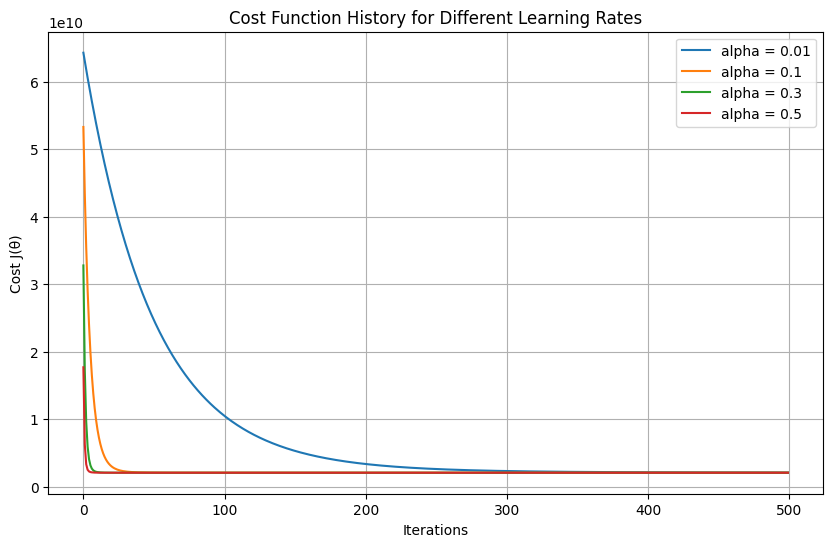

In [40]:
# # Selecting learning rates

# In this part of the exercise, you will get to try out different learning rates for
# the dataset and find a learning rate that converges quickly. You can change
# the learning rate and call the function "gradientDescent".

# You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against
# the number of the iterations.

import numpy as np
import matplotlib.pyplot as plt

iterations = 500
theta = np.zeros((3, 1))
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5])
matrix_J = np.zeros((iterations, len(alpha_vector)))

def gradientDescent(X, y, theta, alpha_vector, iterations):
    m = len(y)  # number of training examples
    J_history = np.zeros((iterations, len(alpha_vector)))

    for i, alpha in enumerate(alpha_vector):
        theta = np.zeros((3, 1))  # Reset theta for each alpha
        for iter in range(iterations):
            h = X @ theta
            error = h - y
            grad_J = (1 / m) * (X.T @ error)
            theta = theta - alpha * grad_J
            J_history[iter, i] = cost_function(theta, X, y)
            print(f"Alpha: {alpha:.2f}, Iteration {iter + 1}\tCost: {J_history[iter, i]:.6f}\tGradient: {grad_J[0, 0]:.3f} {grad_J[1, 0]:.3f} {grad_J[2, 0]:.3f}")
    return theta, J_history

theta, J_history = gradientDescent(X, y, theta, alpha_vector, iterations) # Gradient descent for different alphas

# Plotting the cost function history for different learning rates
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alpha_vector):
    plt.plot(range(iterations), J_history[:, i], label=f'alpha = {alpha}') # Plot each alpha's cost history
plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function History for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()